# 线性回归

## 1.梯度下降法
$$
h_{\theta}(x) = \theta^Tx = \sum_{i=0}^n(\theta_ix_i)
$$
**代价函数**
$$
J(\theta)=\frac{1}{2m}\sum_{j=1}^m(h_{\theta}(x)^{(j)}-y^{(j)})^2
$$
**梯度下降求解**
$$
\theta_i = \theta_i - \alpha\frac{1}{m}\sum_{j=1}^m(h_\theta(x)^{(j)}-y^{(j)})(x_i)^{(j)}
$$
### 矢量化
设i = 0、1，m = 3
$$
\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix} = \begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}-\alpha\frac{1}{m}\sum_{j=1}^m(b^{(j)})
\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(j)},b^{(j)}=h_\theta(x)^{(j)}-y^{(j)}
$$
$$
\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix} = \begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}-\alpha\frac{1}{m}\begin{bmatrix}b^{(1)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(1)}+b^{(2)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(2)}+b^{(3)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(3)}\end{bmatrix},b^{(j)}=h_\theta(x)^{(j)}-y^{(j)}
$$
$$
\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix} = \begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}-\alpha\frac{1}{m}\begin{bmatrix}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(1)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(2)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(3)}\end{bmatrix}\begin{bmatrix}b^{(1)}\\b^{(2)}\\b^{(3)}\end{bmatrix},b^{(j)}=h_\theta(x)^{(j)}-y^{(j)}
$$
其中:
$$
\begin{bmatrix}b^{(1)}\\b^{(2)}\\b^{(3)}\end{bmatrix}=\begin{bmatrix}h_\theta(x)^{(1)}\\h_\theta(x)^{(2)}\\h_\theta(x)^{(3)}\end{bmatrix}-\begin{bmatrix}y^{(1)}\\y^{(2)}\\y^{(3)}\end{bmatrix}=\begin{bmatrix}\begin{bmatrix}x_0&x_1\end{bmatrix}^{(1)}\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}\\\begin{bmatrix}x_0&x_1\end{bmatrix}^{(2)}\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}\\\begin{bmatrix}x_0&x_1\end{bmatrix}^{(3)}\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}\end{bmatrix}-\begin{bmatrix}y^{(1)}\\y^{(2)}\\y^{(3)}\end{bmatrix}=\begin{bmatrix}\begin{bmatrix}x_0&x_1\end{bmatrix}^{(1)}\\\begin{bmatrix}x_0&x_1\end{bmatrix}^{(2)}\\\begin{bmatrix}x_0&x_1\end{bmatrix}^{(3)}\end{bmatrix}\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}-\begin{bmatrix}y^{(1)}\\y^{(2)}\\y^{(3)}\end{bmatrix}
$$
则：
$$
\color{red}{\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}} = \color{red}{\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}}-\alpha\frac{1}{m}\color{blue}{\begin{bmatrix}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(1)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(2)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(3)}\end{bmatrix}}\begin{bmatrix}\color{blue}{\begin{bmatrix}\begin{bmatrix}x_0&x_1\end{bmatrix}^{(1)}\\\begin{bmatrix}x_0&x_1\end{bmatrix}^{(2)}\\\begin{bmatrix}x_0&x_1\end{bmatrix}^{(3)}\end{bmatrix}}\color{red}{\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix}}-\begin{bmatrix}y^{(1)}\\y^{(2)}\\y^{(3)}\end{bmatrix}\end{bmatrix}
$$
$$
\pmb{X}=\begin{bmatrix}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(1)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(2)}\begin{bmatrix}x_0\\x_1\end{bmatrix}^{(3)}\end{bmatrix}, \pmb{\theta}=\begin{bmatrix}\theta_0\\\theta_1\end{bmatrix},\pmb{y}=\begin{bmatrix}y^{(1)}\\y^{(2)}\\y^{(3)}\end{bmatrix}
$$
&nbsp;
&nbsp;
&nbsp;

$$\Large{最终计算公式:\pmb{\theta}=\pmb{\theta}-\alpha\frac{1}{m}\pmb{X}(\pmb{X}^T\pmb{\theta}-\pmb{y})}$$


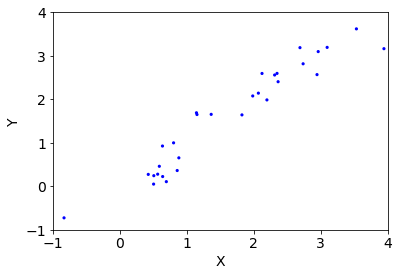

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mean = (1.5, 1.5)
cov = [[1, 0.95], [0.95, 1]]
XY = np.random.multivariate_normal(mean, cov, 30).T
m = XY.shape[1]  # 样本数
# 显示数据
plt.scatter(XY[0,:], XY[1,:], c='b', s=10, edgecolor='none')
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.axis([-1, 4, -1, 4])
plt.show()

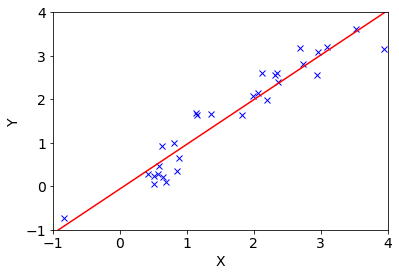

In [3]:
# 回归函数 h=theta^T*X=theta0X0+theta1X1
# 要生成 y=kx+b 的回归函数，令其中 X0=1
X = np.concatenate((np.ones((1, m)), XY[0, :][np.newaxis, :]), axis=0)
Y = XY[1, :][np.newaxis, :].T
theta = np.random.random((2, 1)) - 0.5
alpha = 0.1  # 学习速率
epochs = 200  # 迭代次数
for i in range(epochs):
    theta = theta - alpha * 1/m * X.dot(np.dot(X.T, theta) - Y)

# 回归直线
p_x = np.array([-1, 4])
p_y = theta[0, 0] + theta[1, 0] * p_x
    
# 显示数据
plt.plot(XY[0,:], XY[1,:], 'x', c='b')
plt.plot(p_x, p_y, c='r')

plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.axis([-1, 4, -1, 4])
plt.show()

## 2.线性回归解析解
$$
线性模型: \pmb{X}^T=\begin{bmatrix}x_{11}&x_{12}&\cdots&x_{1d}\\x_{21}&x_{22}&\cdots&x_{2d}\\\vdots&\vdots&\vdots&\vdots\\x_{n1}&x_{n2}&\cdots&x_{nd}\end{bmatrix}\space\space\space\space \pmb{y}=\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix}
$$
&nbsp;
&nbsp;
$$
(显然R(X^T)\not=R(X^T|y), \pmb{X}^T\pmb{\theta}=\pmb{y}\space无解)\space\space解决问题：\pmb{X}^T\pmb{\theta}\rightarrow\pmb{y}
$$
&nbsp;
&nbsp;
$$
引入代价函数：J=\lVert\pmb{X}^T\pmb{\theta}-\pmb{y}\rVert_2^2,\space 使\frac{\partial{J}}{\partial\theta}=0\space而不是J=0
$$
&nbsp;
$$
\begin{aligned}
J&=\lVert\pmb{X}^T\pmb{\theta}-\pmb{y}\rVert_2^2=(\pmb{X}^T\pmb{\theta}-\pmb{y})^T(\pmb{X}^T\pmb{\theta}-\pmb{y})=(\pmb{\theta}^T\pmb{X}-\pmb{y}^T)(\pmb{X}^T\pmb{\theta}-\pmb{y})\\
&=\pmb{\theta}^T\pmb{X}\pmb{X}^T\pmb{\theta}-\pmb{\theta}^T\pmb{X}\pmb{y}-\pmb{y}^T\pmb{X}^T\pmb{\theta}+\pmb{y}^T\pmb{y}
\end{aligned}
$$
&nbsp;
$$其中，对于\pmb{\theta}^T\pmb{X}\pmb{y}，设X维数为2，样本数为3$$
$$
\begin{aligned}
\pmb{\theta}^T\pmb{X}\pmb{y}&=\begin{bmatrix}\theta_1,\theta_2\end{bmatrix}\begin{bmatrix}x_{11}&x_{21}&x_{31}\\x_{12}&x_{22}&x_{32}\end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}\\
&=\begin{bmatrix}\theta_1x_{11}+\theta_2x_{12},\theta_1x_{21}+\theta_2x_{22},\theta_1x_{31}+\theta_2x_{32}\end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}\\
&=(\theta_1x_{11}+\theta_2x_{12})y_1+(\theta_1x_{21}+\theta_2x_{22})y_2+(\theta_1x_{31}+\theta_2x_{32})y_3
\end{aligned}
$$

$$
\frac{\partial{\pmb{\theta}^T\pmb{X}\pmb{y}}}{\partial\theta}=\begin{bmatrix}\frac{\partial{\theta^TXy}}{\partial\theta_1}\\\frac{\partial{\theta^TXy}}{\partial\theta_2}\end{bmatrix}=\begin{bmatrix}x_{11}y_1+x_{21}y_2+x_{31}y_3\\x_{12}y_1+x_{22}y_2+x_{32}y_3\end{bmatrix}=\begin{bmatrix}x_{11}&x_{21}&x_{31}\\x_{12}&x_{22}&x_{32}\end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3\end{bmatrix}=\pmb{X}\pmb{y}
$$

$$
求导：\frac{\partial{J}}{\partial\theta}=\frac{\partial{(\pmb{\theta}^T\pmb{X}\pmb{X}^T\pmb{\theta}-\pmb{\theta}^T\pmb{X}\pmb{y}-\pmb{y}^T\pmb{X}^T\pmb{\theta}+\pmb{y}^T\pmb{y})}}{\partial\theta}=2\pmb{X}\pmb{X}^T\pmb{\theta}-2\pmb{X}\pmb{y}=0
$$
$$
\pmb{X}\pmb{X}^T\pmb{\theta}-\pmb{X}\pmb{y}=0\Rightarrow\pmb{\theta}=(\pmb{X}\pmb{X}^T)^{-1}\pmb{X}\pmb{y}(如果\pmb{X}\pmb{X}^T可逆)
$$

$$
为使\pmb{X}\pmb{X}^T可逆，由于\pmb{S}=\pmb{X}\pmb{X}^T为d\times d矩阵，为使\pmb{S}可逆，\pmb{S}必须满秩，即R(\pmb{X}\pmb{X}^T)=d，因此样本矩阵X须满足n>d
$$

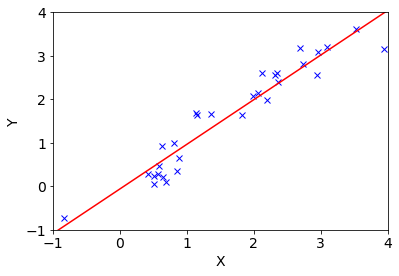

In [5]:
theta_2 = np.linalg.inv(X.dot(X.T)).dot(X).dot(Y)

# 回归直线
p_x2 = np.array([-1, 4])
p_y2 = theta_2[0, 0] + theta_2[1, 0] * p_x2

# 显示数据
plt.plot(XY[0,:], XY[1,:], 'x', c='b')
plt.plot(p_x2, p_y2, c='r')

plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.axis([-1, 4, -1, 4])
plt.show()